Dataset - https://drive.google.com/file/d/1hCnipiKumntj7ibxSL3NCcVAZIEi1ZeJ/view?usp=drive_link

# **Imports**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_curve, auc, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, plot_importance


# **Loading The Data**

Lets load the data into a dataframe.

In [ ]:
ddos = pd.read_csv("/content/APA-DDoS-Dataset.csv")
ddos

,ip.src,ip.dst,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,...,tcp.seq,tcp.ack,frame.time,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,192.168.1.1,192.168.23.2,2412,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071112000 Mountain Dayli...,8,432,4,216,4,216,DDoS-PSH-ACK
1,192.168.1.1,192.168.23.2,2413,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071138000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
2,192.168.1.1,192.168.23.2,2414,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071146000 Mountain Dayli...,12,648,6,324,6,324,DDoS-PSH-ACK
3,192.168.1.1,192.168.23.2,2415,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071152000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
4,192.168.1.1,192.168.23.2,2416,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071159000 Mountain Dayli...,6,324,3,162,3,162,DDoS-PSH-ACK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151195,192.168.19.1,192.168.23.2,37360,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.923006000 Mountain Dayli...,10,1146,6,560,4,586,Benign
151196,192.168.19.1,192.168.23.2,37362,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.935672000 Mountain Dayli...,10,1151,6,560,4,591,Benign
151197,192.168.19.1,192.168.23.2,37364,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.957469000 Mountain Dayli...,10,1144,6,560,4,584,Benign
151198,192.168.19.1,192.168.23.2,37366,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.970971000 Mountain Dayli...,10,1175,6,560,4,615,Benign


Lets Display the data frame, and check some info about the dataset.

In [ ]:
ddos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151200 entries, 0 to 151199
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip.src           151200 non-null  object
 1   ip.dst           151200 non-null  object
 2   tcp.srcport      151200 non-null  int64 
 3   tcp.dstport      151200 non-null  int64 
 4   ip.proto         151200 non-null  int64 
 5   frame.len        151200 non-null  int64 
 6   tcp.flags.syn    151200 non-null  int64 
 7   tcp.flags.reset  151200 non-null  int64 
 8   tcp.flags.push   151200 non-null  int64 
 9   tcp.flags.ack    151200 non-null  int64 
 10  ip.flags.mf      151200 non-null  int64 
 11  ip.flags.df      151200 non-null  int64 
 12  ip.flags.rb      151200 non-null  int64 
 13  tcp.seq          151200 non-null  int64 
 14  tcp.ack          151200 non-null  int64 
 15  frame.time       151200 non-null  object
 16  Packets          151200 non-null  int64 
 17  Bytes     

Data Dictionary

1. **ip.src:** Source IP address of the network traffic.
2. **ip.dst:** Destination IP address of the network traffic.
3. **tcp.srcport:** Source port number for TCP (Transmission Control Protocol).
4. **tcp.dstport:** Destination port number for TCP.
5. **ip.proto:** IP protocol used (e.g., TCP, UDP).
6. **frame.len:** Length of the network frame.
7. **tcp.flags.syn:** TCP SYN flag.
8. **tcp.flags.reset:** TCP RST flag.
9. **tcp.flags.push:** TCP PUSH flag.
10. **tcp.flags.ack:** TCP ACK flag.
11. **ip.flags.mf:** IP More Fragments flag.
12. **ip.flags.df:** IP Do Not Fragment flag.
13. **ip.flags.rb:** Reserved bits in the IP header.
14. **tcp.seq:** TCP sequence number.
15. **tcp.ack:** TCP acknowledgment number.
16. **frame.time:** Timestamp of the network frame.
17. **Packets:** Number of packets in the network frame.
18. **Bytes:** Number of bytes in the network frame.
19. **Tx Packets:** Number of transmitted packets.
20. **Tx Bytes:** Number of transmitted bytes.
21. **Rx Packets:** Number of received packets.
22. **Rx Bytes:** Number of received bytes.
23. **Label:** The label or category assigned to the network event (e.g., 'DDoS-PSH-ACK', 'Benign', 'DDoS-ACK').

These columns provide information about the source and destination of the traffic, the protocol used, flags in the TCP header, packet and byte counts, and the label of network event.

# **Exploratory Data Analysis**


## **Checking for nulls**


In [ ]:
ddos.isna().sum()

,0
ip.src,0
ip.dst,0
tcp.srcport,0
tcp.dstport,0
ip.proto,0
frame.len,0
tcp.flags.syn,0
tcp.flags.reset,0
tcp.flags.push,0
tcp.flags.ack,0


## **Checking for duplicates**


In [ ]:
ddos.duplicated().sum()

0

There are no duplicates or nulls that needs to be dropped, so we can proceed into our analysis.

In [ ]:
ddos.groupby('Label').size()

,0
Label,
Benign,75600
DDoS-ACK,37800
DDoS-PSH-ACK,37800


We have 75600 Benign, and 75600 DDOS attacks

## **Exploring Relations between features**

By observing the pairplot generated, we can notice too many features that have just a single value across the coloumn, they can be dropped, we can notice which ones exactly

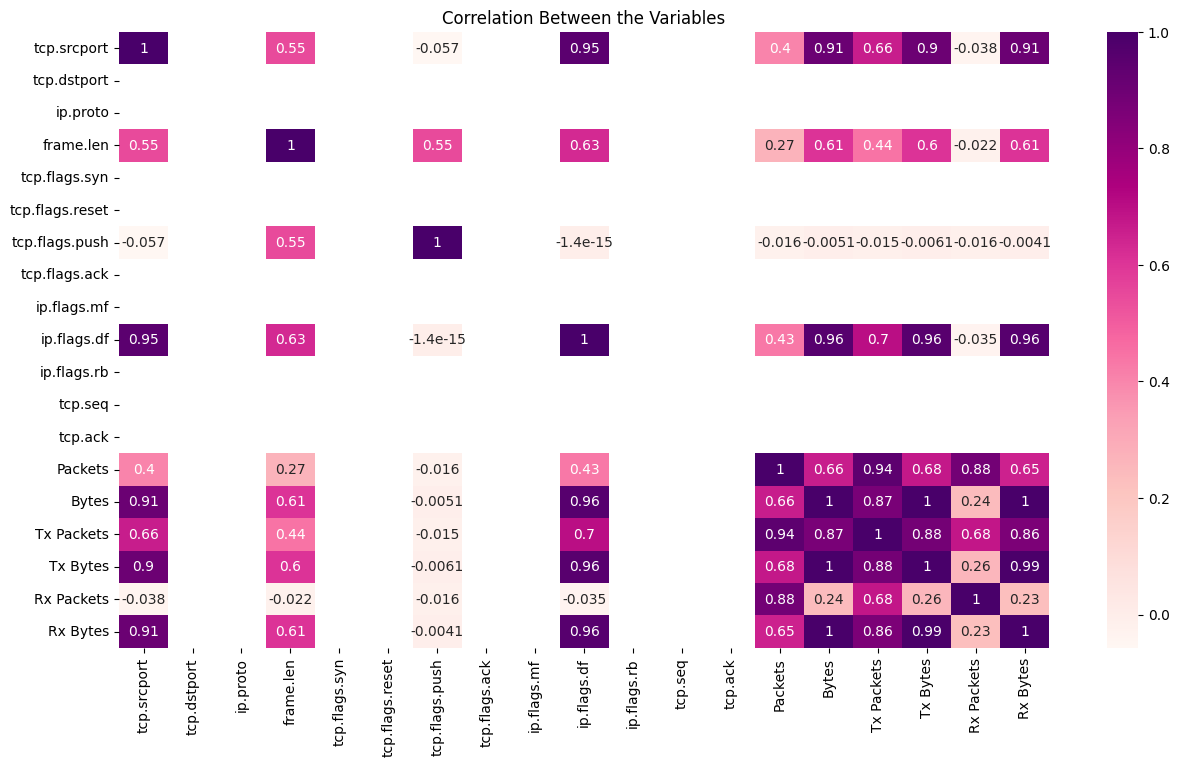

In [ ]:
numeric_data = ddos.select_dtypes(include='number')# select only the columns in the DataFrame data that have numeric (number) data
correlation_matrix = numeric_data.corr()
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True,ax=ax,  cmap="RdPu")
plt.title('Correlation Between the Variables')
#plt.xticks(rotation=45);
plt.show()

So we will be dropping

1. tcp.dstport
2. ip.proto
3. tcp.flags.syn
4. tcp.flags.reset
5. tcp.flags.ack
6. ip.flags.mf
7. ip.flags.rb
8. tcp.seq,tcp.ack

In [ ]:
columns_to_drop = ['tcp.dstport', 'ip.proto', 'tcp.flags.syn', 'tcp.flags.reset', 'tcp.flags.ack', 'ip.flags.mf', 'ip.flags.rb', 'tcp.seq', 'tcp.ack']
ddos_new= ddos.drop(columns=columns_to_drop).copy()
ddos_new

,ip.src,ip.dst,tcp.srcport,frame.len,tcp.flags.push,ip.flags.df,frame.time,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,192.168.1.1,192.168.23.2,2412,54,1,0,16-Jun 2020 20:18:15.071112000 Mountain Dayli...,8,432,4,216,4,216,DDoS-PSH-ACK
1,192.168.1.1,192.168.23.2,2413,54,1,0,16-Jun 2020 20:18:15.071138000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
2,192.168.1.1,192.168.23.2,2414,54,1,0,16-Jun 2020 20:18:15.071146000 Mountain Dayli...,12,648,6,324,6,324,DDoS-PSH-ACK
3,192.168.1.1,192.168.23.2,2415,54,1,0,16-Jun 2020 20:18:15.071152000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
4,192.168.1.1,192.168.23.2,2416,54,1,0,16-Jun 2020 20:18:15.071159000 Mountain Dayli...,6,324,3,162,3,162,DDoS-PSH-ACK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151195,192.168.19.1,192.168.23.2,37360,66,0,1,16-Jun 2020 22:10:46.923006000 Mountain Dayli...,10,1146,6,560,4,586,Benign
151196,192.168.19.1,192.168.23.2,37362,66,0,1,16-Jun 2020 22:10:46.935672000 Mountain Dayli...,10,1151,6,560,4,591,Benign
151197,192.168.19.1,192.168.23.2,37364,66,0,1,16-Jun 2020 22:10:46.957469000 Mountain Dayli...,10,1144,6,560,4,584,Benign
151198,192.168.19.1,192.168.23.2,37366,66,0,1,16-Jun 2020 22:10:46.970971000 Mountain Dayli...,10,1175,6,560,4,615,Benign


We don't need the frame.time as well

In [ ]:
ddos_new= ddos_new.drop(columns=['frame.time'])
ddos_new

,ip.src,ip.dst,tcp.srcport,frame.len,tcp.flags.push,ip.flags.df,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,192.168.1.1,192.168.23.2,2412,54,1,0,8,432,4,216,4,216,DDoS-PSH-ACK
1,192.168.1.1,192.168.23.2,2413,54,1,0,10,540,5,270,5,270,DDoS-PSH-ACK
2,192.168.1.1,192.168.23.2,2414,54,1,0,12,648,6,324,6,324,DDoS-PSH-ACK
3,192.168.1.1,192.168.23.2,2415,54,1,0,10,540,5,270,5,270,DDoS-PSH-ACK
4,192.168.1.1,192.168.23.2,2416,54,1,0,6,324,3,162,3,162,DDoS-PSH-ACK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151195,192.168.19.1,192.168.23.2,37360,66,0,1,10,1146,6,560,4,586,Benign
151196,192.168.19.1,192.168.23.2,37362,66,0,1,10,1151,6,560,4,591,Benign
151197,192.168.19.1,192.168.23.2,37364,66,0,1,10,1144,6,560,4,584,Benign
151198,192.168.19.1,192.168.23.2,37366,66,0,1,10,1175,6,560,4,615,Benign


## **Preparing the Data**

In [ ]:
# Assuming your DataFrame is named df
ddos_new['Label_new'] = ddos_new['Label'].apply(lambda x: 'Benign' if x == 'Benign' else 'DDoS')
ddos_new.drop(columns=['Label'], inplace=True)
ddos_new.rename(columns={'Label_new': 'Label'}, inplace=True)
ddos_new

,ip.src,ip.dst,tcp.srcport,frame.len,tcp.flags.push,ip.flags.df,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,192.168.1.1,192.168.23.2,2412,54,1,0,8,432,4,216,4,216,DDoS
1,192.168.1.1,192.168.23.2,2413,54,1,0,10,540,5,270,5,270,DDoS
2,192.168.1.1,192.168.23.2,2414,54,1,0,12,648,6,324,6,324,DDoS
3,192.168.1.1,192.168.23.2,2415,54,1,0,10,540,5,270,5,270,DDoS
4,192.168.1.1,192.168.23.2,2416,54,1,0,6,324,3,162,3,162,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151195,192.168.19.1,192.168.23.2,37360,66,0,1,10,1146,6,560,4,586,Benign
151196,192.168.19.1,192.168.23.2,37362,66,0,1,10,1151,6,560,4,591,Benign
151197,192.168.19.1,192.168.23.2,37364,66,0,1,10,1144,6,560,4,584,Benign
151198,192.168.19.1,192.168.23.2,37366,66,0,1,10,1175,6,560,4,615,Benign


In [ ]:
y = ddos_new['Label']
y

,Label
0,DDoS
1,DDoS
2,DDoS
3,DDoS
4,DDoS
...,...
151195,Benign
151196,Benign
151197,Benign
151198,Benign


Lets Encode the y

There is no need for One Hot Encoding , since we now have 2 classes only.

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

There are many ip addresses so we need to encode them using one hot encoding.
There is no ordinality so using label encoding for would be biases.

In [ ]:
X = ddos_new.drop(columns=['Label']).copy()


categorical_columns = ['ip.src', 'ip.dst']# Select categorical columns for one-hot encoding
'''
# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)


pipeline = Pipeline(steps=[('preprocessor', preprocessor)])# Create a pipeline


X_encoded = pipeline.fit_transform(X)# Fit and transform

# Get the column names after encoding
encoded_column_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_columns)
column_names = list(encoded_column_names) + list(X.columns.difference(categorical_columns))


X = pd.DataFrame(X_encoded, columns=column_names)
'''

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform
X_encoded = pipeline.fit_transform(X)

# Get the column names after encoding
encoded_column_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_columns)
column_names = list(encoded_column_names) + list(X.columns.difference(categorical_columns))

# Convert to DataFrame
X = pd.DataFrame(X_encoded, columns=column_names)


In [ ]:
X

,ip.src_192.168.1.1,ip.src_192.168.10.1,ip.src_192.168.11.1,ip.src_192.168.13.1,ip.src_192.168.14.1,ip.src_192.168.16.1,ip.src_192.168.17.1,ip.src_192.168.19.1,ip.src_192.168.2.1,ip.src_192.168.20.1,...,Bytes,Packets,Rx Bytes,Rx Packets,Tx Bytes,Tx Packets,frame.len,ip.flags.df,tcp.flags.push,tcp.srcport
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2412.0,54.0,1.0,0.0,8.0,432.0,4.0,216.0,4.0,216.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2413.0,54.0,1.0,0.0,10.0,540.0,5.0,270.0,5.0,270.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2414.0,54.0,1.0,0.0,12.0,648.0,6.0,324.0,6.0,324.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2415.0,54.0,1.0,0.0,10.0,540.0,5.0,270.0,5.0,270.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2416.0,54.0,1.0,0.0,6.0,324.0,3.0,162.0,3.0,162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,37360.0,66.0,0.0,1.0,10.0,1146.0,6.0,560.0,4.0,586.0
151196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,37362.0,66.0,0.0,1.0,10.0,1151.0,6.0,560.0,4.0,591.0
151197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,37364.0,66.0,0.0,1.0,10.0,1144.0,6.0,560.0,4.0,584.0
151198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,37366.0,66.0,0.0,1.0,10.0,1175.0,6.0,560.0,4.0,615.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# Split the data into training and testing sets

In [ ]:
X_train

,ip.src_192.168.1.1,ip.src_192.168.10.1,ip.src_192.168.11.1,ip.src_192.168.13.1,ip.src_192.168.14.1,ip.src_192.168.16.1,ip.src_192.168.17.1,ip.src_192.168.19.1,ip.src_192.168.2.1,ip.src_192.168.20.1,...,Bytes,Packets,Rx Bytes,Rx Packets,Tx Bytes,Tx Packets,frame.len,ip.flags.df,tcp.flags.push,tcp.srcport
39462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,34562.0,223.0,1.0,1.0,10.0,1229.0,6.0,561.0,4.0,668.0
86399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13220.0,54.0,0.0,0.0,10.0,540.0,5.0,270.0,5.0,270.0
46424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40372.0,223.0,1.0,1.0,10.0,1229.0,6.0,561.0,4.0,668.0
123679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54482.0,66.0,0.0,1.0,10.0,1170.0,6.0,560.0,4.0,610.0
23643,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5706.0,54.0,1.0,0.0,8.0,432.0,4.0,216.0,4.0,216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46882.0,66.0,0.0,1.0,10.0,1151.0,6.0,560.0,4.0,591.0
103694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6153.0,54.0,0.0,0.0,10.0,540.0,5.0,270.0,5.0,270.0
131932,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,46358.0,66.0,0.0,1.0,10.0,1229.0,6.0,561.0,4.0,668.0
146867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,56936.0,66.0,0.0,1.0,10.0,1151.0,6.0,560.0,4.0,591.0


In [ ]:
y_train

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
class_counts = np.bincount(y_train)
print(f'Count for class 0 (Benign): {class_counts[0]}')
print(f'Count for class 1 (DDoS): {class_counts[1]}')

Count for class 0 (Benign): 60431
Count for class 1 (DDoS): 60529


## **Building the Model**

In [ ]:
X_train

,ip.src_192.168.1.1,ip.src_192.168.10.1,ip.src_192.168.11.1,ip.src_192.168.13.1,ip.src_192.168.14.1,ip.src_192.168.16.1,ip.src_192.168.17.1,ip.src_192.168.19.1,ip.src_192.168.2.1,ip.src_192.168.20.1,...,Bytes,Packets,Rx Bytes,Rx Packets,Tx Bytes,Tx Packets,frame.len,ip.flags.df,tcp.flags.push,tcp.srcport
39462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,34562.0,223.0,1.0,1.0,10.0,1229.0,6.0,561.0,4.0,668.0
86399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13220.0,54.0,0.0,0.0,10.0,540.0,5.0,270.0,5.0,270.0
46424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40372.0,223.0,1.0,1.0,10.0,1229.0,6.0,561.0,4.0,668.0
123679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54482.0,66.0,0.0,1.0,10.0,1170.0,6.0,560.0,4.0,610.0
23643,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5706.0,54.0,1.0,0.0,8.0,432.0,4.0,216.0,4.0,216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46882.0,66.0,0.0,1.0,10.0,1151.0,6.0,560.0,4.0,591.0
103694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6153.0,54.0,0.0,0.0,10.0,540.0,5.0,270.0,5.0,270.0
131932,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,46358.0,66.0,0.0,1.0,10.0,1229.0,6.0,561.0,4.0,668.0
146867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,56936.0,66.0,0.0,1.0,10.0,1151.0,6.0,560.0,4.0,591.0


## **Decision Tree**

In [ ]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(f"Decision Tree Accuracy: {accuracy_decision_tree * 100:.2f}%")

Decision Tree Accuracy: 100.00%


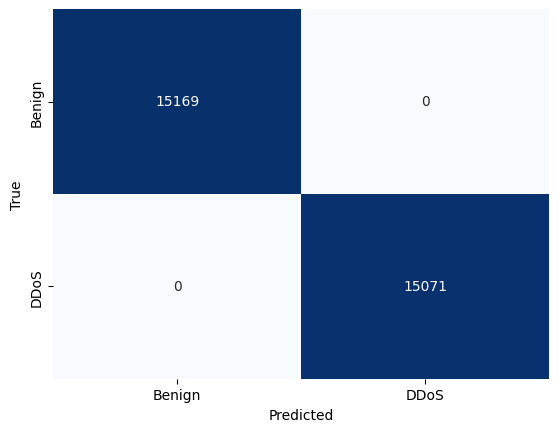

In [ ]:
cm = confusion_matrix(y_test, y_pred_decision_tree)
class_labels = ["Benign", "DDoS"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## **Random Forest**

Accuracy: 100.00%


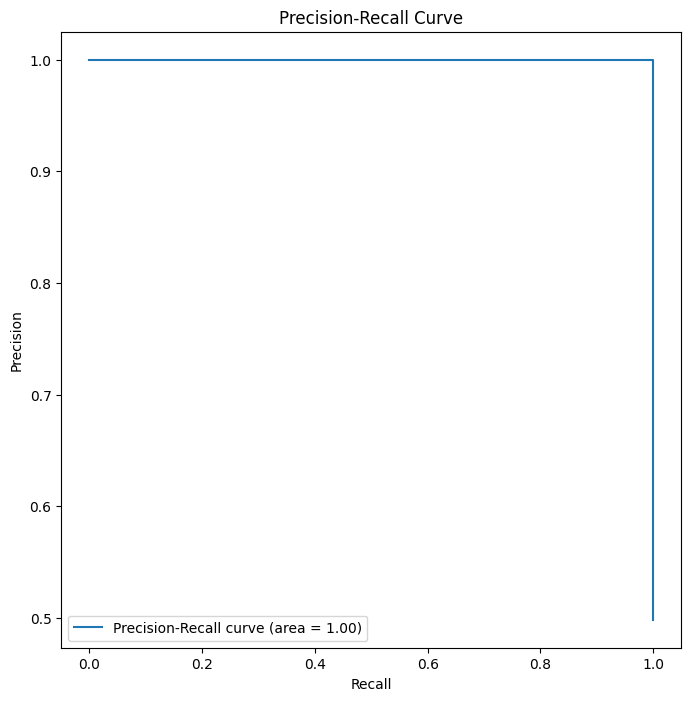

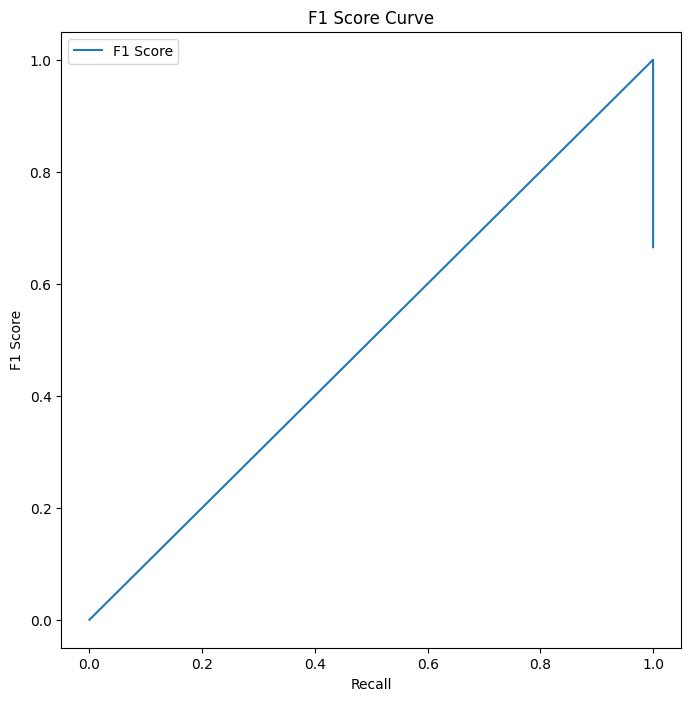

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)#  predict

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot precision-recall curve
fig, ax = plt.subplots(figsize=(8, 8))
precision, recall, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
area = auc(recall, precision)

plt.plot(recall, precision, label=f'Precision-Recall curve (area = {area:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Plot F1 score
fig, ax = plt.subplots(figsize=(8, 8))
f1 = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1, label='F1 Score')
plt.xlabel('Recall')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.legend(loc='best')
plt.show()


The precision-recall area is 1, meaning the model has high precision and recall, showing strong performance.

The F1 score curve is a straight line with a 45-degree slope, indicating a balanced trade-off between precision and recall at all thresholds. This means the model consistently captures positive instances while avoiding false positives.

These results look promising and suggest the model generalizes well.

## **XGBOOST**

In [ ]:
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


Plotting feature importance

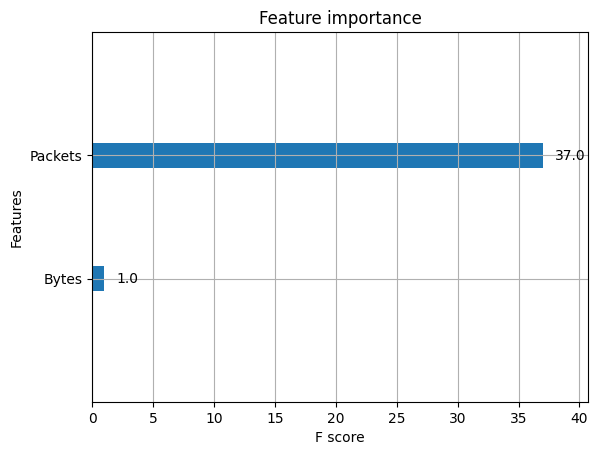

In [ ]:
plot_importance(xgb_model)
plt.show()

Packets is the most important feature when taking the decision

Let now plot the confusion matrix, we have 100% accuracy, so there should be no confusion.

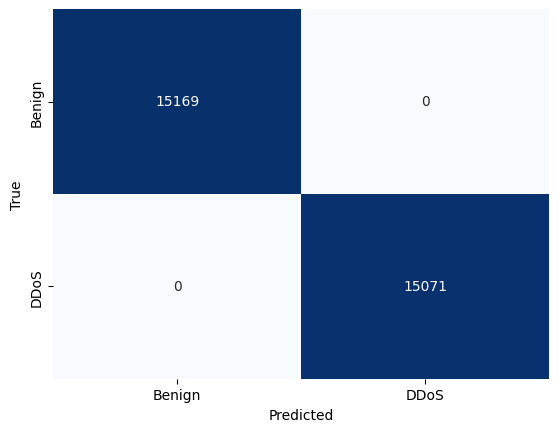

In [ ]:
cm = confusion_matrix(y_test, y_pred)
class_labels = ["Benign", "DDoS"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Lets finally check the AUC curve to check that the model is really generalizing and not overfitting.

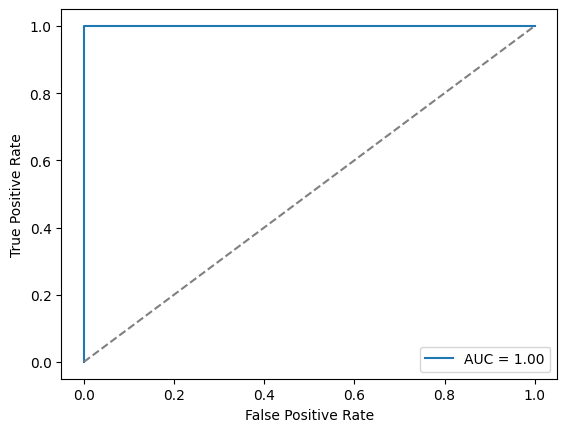

In [ ]:
y_prob = xgb_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


## Implementing KNN

Testing the optimal number of neighbors

In [ ]:
######################## DO NOT RUN THE CELL!! TAKES TOO MUCH TIME TO RUN. VALUE OF "best_k" STORED IN ANOTHER CELL #################################################
'''
# Define range of k values to test
k_values = range(1, 21)
accuracies = []

# Loop through different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    accuracies.append(scores.mean())
'''

"\n# Define range of k values to test\nk_values = range(1, 21)\naccuracies = []\n\n# Loop through different k values\nfor k in k_values:\n    knn = KNeighborsClassifier(n_neighbors=k)\n    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')\n    accuracies.append(scores.mean())\n"

In [ ]:
################################# DO NOT RUN !!!!!!!!!!!!!!! ##############################################
'''
# Plot accuracy vs. k values
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Optimal k for KNN')
plt.show()
'''

"\n# Plot accuracy vs. k values\nplt.plot(k_values, accuracies, marker='o')\nplt.xlabel('Number of Neighbors (k)')\nplt.ylabel('Cross-Validated Accuracy')\nplt.title('Optimal k for KNN')\nplt.show()\n"

In [ ]:
##################### DO NOT RUN!!!!!!!!!!!!!!!! ####################################################################

'''
# Get the best k value
best_k = k_values[accuracies.index(max(accuracies))]
print(f"Optimal k: {best_k}, Accuracy: {max(accuracies):.2f}")
'''

'\n# Get the best k value\nbest_k = k_values[accuracies.index(max(accuracies))]\nprint(f"Optimal k: {best_k}, Accuracy: {max(accuracies):.2f}")\n'

In [ ]:
best_k=1  #found out

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15169
           1       1.00      1.00      1.00     15071

    accuracy                           1.00     30240
   macro avg       1.00      1.00      1.00     30240
weighted avg       1.00      1.00      1.00     30240



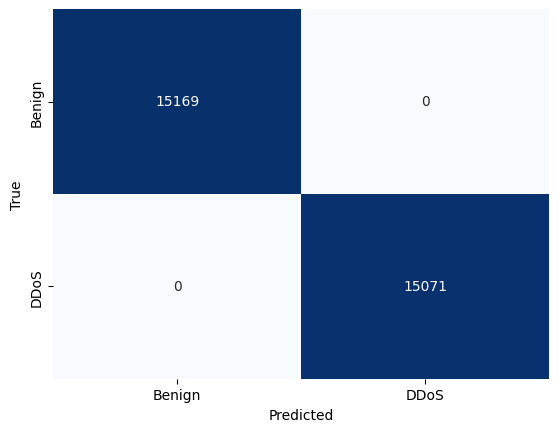

In [ ]:
# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=best_k)  # Set `n_neighbors` as desired

# Fit the model
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
class_labels = ["Benign", "DDoS"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# SVM

SVM Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15169
           1       1.00      1.00      1.00     15071

    accuracy                           1.00     30240
   macro avg       1.00      1.00      1.00     30240
weighted avg       1.00      1.00      1.00     30240



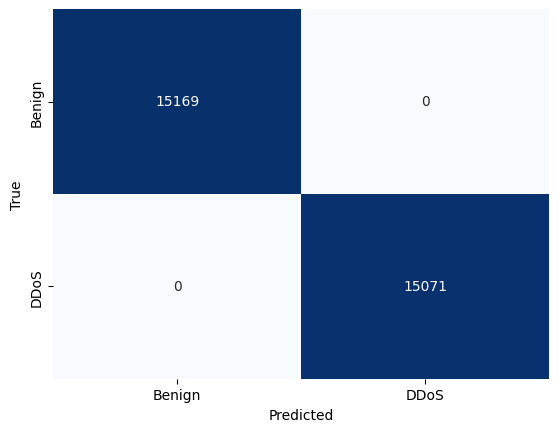

In [ ]:
# Initialize the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', probability=True)

# Fit the model
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
cm= confusion_matrix(y_test, y_pred_svm)
class_labels = ["Benign", "DDoS"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Plot accuracy vs threshold values for SVM

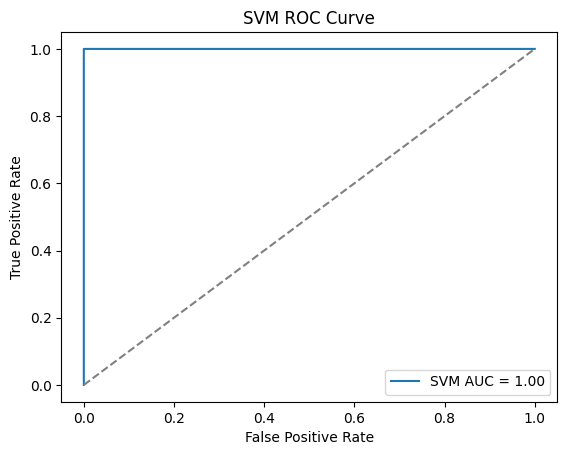

In [ ]:
# Generate probabilities for ROC Curve
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr, tpr)

# Plot ROC Curve
plt.plot(fpr, tpr, label=f'SVM AUC = {roc_auc_svm:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("SVM ROC Curve")
plt.legend()
plt.show()

# Gradient Boosting

Gradient Boosting Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15169
           1       1.00      1.00      1.00     15071

    accuracy                           1.00     30240
   macro avg       1.00      1.00      1.00     30240
weighted avg       1.00      1.00      1.00     30240



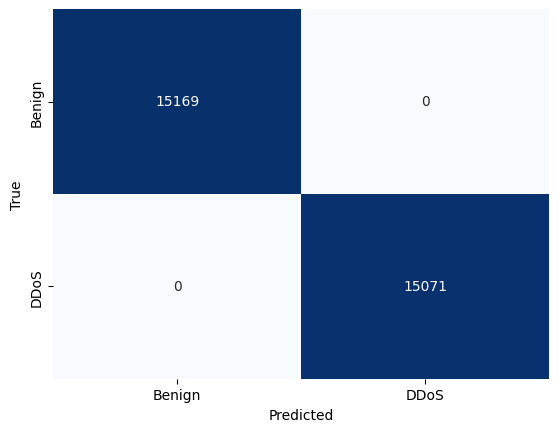

In [ ]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Fit the model
gb_model.fit(X_train, y_train)

# Predict on test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
cm=confusion_matrix(y_test, y_pred_gb)
class_labels = ["Benign", "DDoS"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Plot accuracy vs threshold values for Gradient Boosting

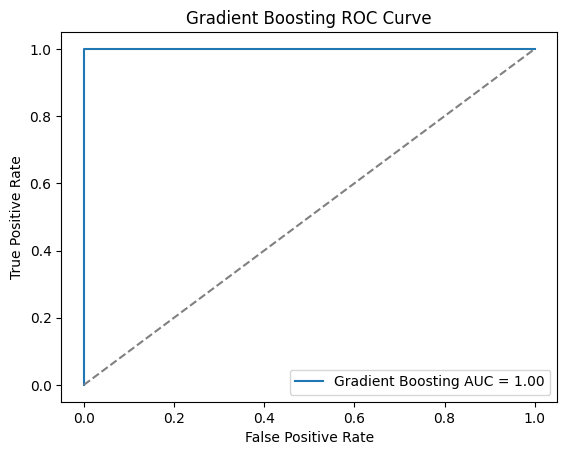

In [ ]:
# Generate probabilities for ROC Curve
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC Curve
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting AUC = {roc_auc_gb:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Gradient Boosting ROC Curve")
plt.legend()
plt.show()

# Neural Network

MLPClassifier Accuracy: 100.00%


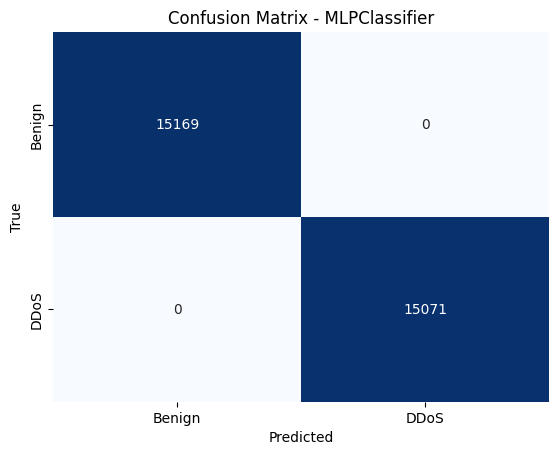

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(21, 21, 21), activation='relu',
                          solver='adam', max_iter=500, random_state=42)

# Train the MLPClassifier
mlp_model.fit(X_train, y_train)

# Make Predictions
y_pred_mlp = mlp_model.predict(X_test)

# Calculate Accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLPClassifier Accuracy: {accuracy_mlp * 100:.2f}%")

# Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
class_labels = ["Benign", "DDoS"]

# Plot Confusion Matrix
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - MLPClassifier")
plt.show()


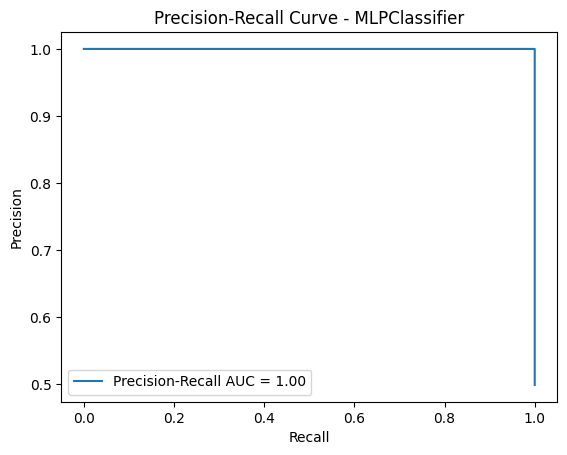

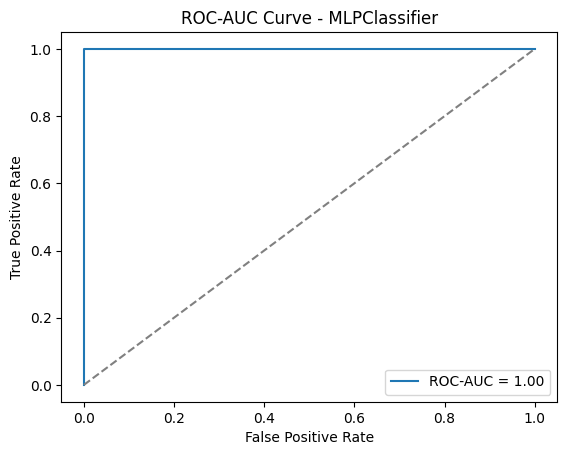

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Get prediction probabilities
y_prob_mlp = mlp_model.predict_proba(X_test)[:, 1]

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_mlp)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, label=f'Precision-Recall AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - MLPClassifier')
plt.legend()
plt.show()

# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_mlp)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve - MLPClassifier')
plt.legend()
plt.show()
